##Lab 8
# Samikshya Pandey

In [1]:
#Importing all necessary libraries for data visualization 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns


## Task 1 


In [2]:
air_pass = pd.read_csv("AirPassengers.csv")
air_pass.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
Day_Year = air_pass['date'].str.split("-" , expand =True) 
year = Day_Year[0].to_frame()
air_pass["Year"] = year
air_pass.head()
no_year = air_pass["Year"].unique() #Calculating year column to see different year values
print(no_year)
#Creating label year based on the no_year value calculated for visualization purpose.
label_year = ["1949", "1950","1951", "1952","1953","1954", "1955","1956","1957","1958", "1959", "1960"]


['1949' '1950' '1951' '1952' '1953' '1954' '1955' '1956' '1957' '1958'
 '1959' '1960']


<IPython.core.display.Javascript object>


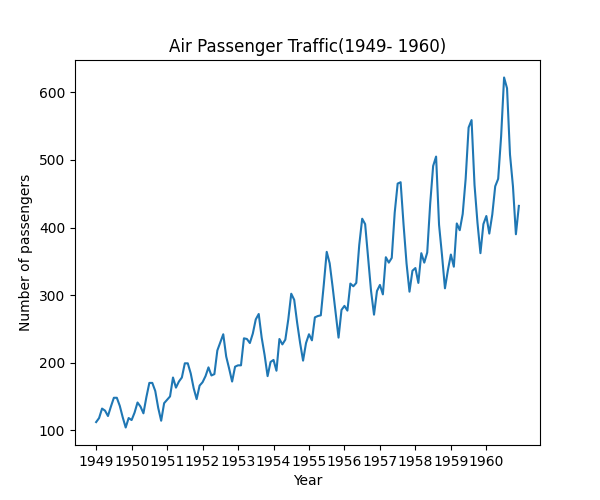

In [4]:
plt.figure(1, figsize = (6,5))
plt.plot(air_pass["date"], air_pass["value"]) 
plt.title('Air Passenger Traffic(1949- 1960)')
plt.xlabel('Year') 
plt.ylabel('Number of passengers') 
plt.xticks(air_pass.date[::12],label_year ) 


plt.show()

## Task 2 
Plot a bar chart (see below) to show the number 
of vehicles per manufacturer. 

In [5]:
cars = pd.read_csv("cars.csv")
cars.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<IPython.core.display.Javascript object>


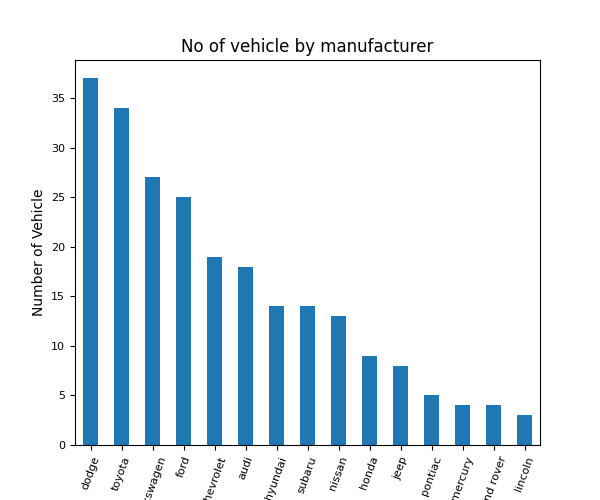

In [6]:
plt.figure(2, figsize = (6,5))
cars['manufacturer'].value_counts().plot(kind='bar')
plt.title('No of vehicle by manufacturer')
plt.xlabel('Manufacturer') 
plt.tick_params(labelsize = 8)
plt.ylabel('Number of Vehicle') 
plt.xticks(rotation= 70);
plt.show()



In [7]:
## USING SNS TO SOLVE THE SAME PROBLEM> (THIS IS JUST FOR MY REFERENCE)
#plt.figure(3)
#sns.countplot(x = "manufacturer", data = cars)
#plt.title('No of cars manufacturer')
#plt.xlabel('Model type') 
#plt.tick_params(labelsize = 11)
#plt.ylabel('Numbers', fontsize = 11)
#plt.xticks(rotation= 70);
#plt.show()

## Task 3 
Download the dataset “netflix_titles.csv” from Canvas. Plot a histogram (see below) to visualize 
the distribution of release_years of the shows that are on Netflix. The visualization should be in 
batches of 1 year.

In [8]:
netflix_title = pd.read_csv("netflix_titles.csv")
netflix_title.head()
#Calculating the max and min vlaue of year to calculate the number of bins to use in histogram.  
max_year = netflix_title["release_year"].max()
min_year = netflix_title["release_year"].min()
bins_year = max_year - min_year
#print(bins)
#So we can use bins = 96 to get the approximate value of bins that would give us batch of 1 year. 


<IPython.core.display.Javascript object>


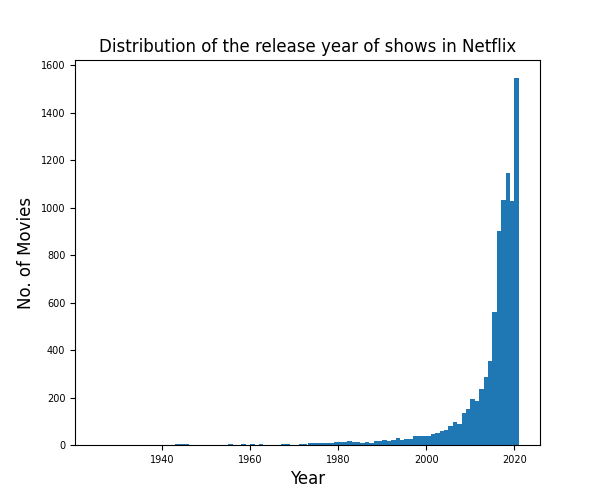

In [9]:
plt.figure(3, figsize = (6,5))
plt.title('Distribution of the release year of shows in Netflix')
plt.hist(netflix_title["release_year"], bins = bins_year)   #using the length calculated as the value_counts of the release_year to distributed the bin size      
plt.ylabel('No. of Movies',fontsize = 12)
plt.xlabel('Year',fontsize = 12)
plt.tick_params(labelsize = 7);
plt.show()

## Task 4: 
Use the dataset “cars.csv” from task 2. Plot a box plot (see below) to visualize highway mileage 
of each vehicle class. 

In [10]:
cars.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<IPython.core.display.Javascript object>


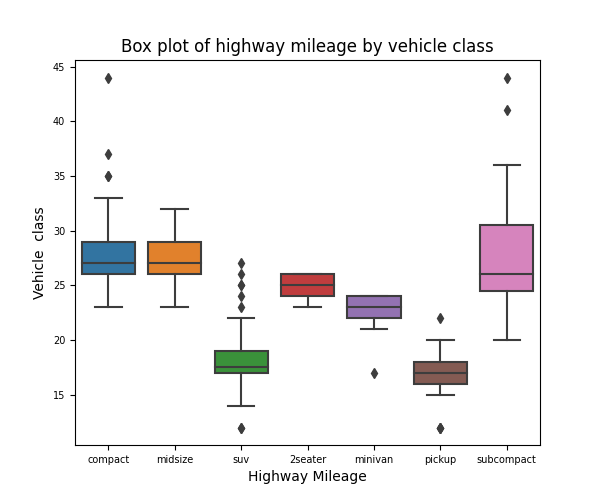

In [11]:
#Using sns to create box plot 
plt.figure(4, figsize = (6,5))
sns.boxplot(x = cars["class"], y = cars["hwy"])
plt.title('Box plot of highway mileage by vehicle class')      
plt.ylabel('Vehicle  class',fontsize = 10)
plt.xlabel('Highway Mileage',fontsize = 10)
plt.tick_params(labelsize = 7);
plt.show()

## Task  5 
Use the dataset “cars.csv” from task 2. Plot a bar chart (see below) to visualize percentage of 
vehicle class. 

In [12]:
#Calculating how many sub groups there are and how many vehicle there are per group
print(cars["class"].nunique())
print(cars.groupby("class").size())


7
class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
dtype: int64


In [13]:
#Value count of all class within car to create the data required to create the pie chart 
compact = cars.loc[cars["class"] == "compact"].count()[0]
minivan = cars.loc[cars["class"] == "minivan"].count()[0]
pickup = cars.loc[cars["class"] == "pickup"].count()[0]
suv = cars.loc[cars["class"] == "suv"].count()[0]
midsize = cars.loc[cars["class"] == "midsize"].count()[0]
subcompact = cars.loc[cars["class"] == "subcompact"].count()[0]
twoseater = cars.loc[cars["class"] == "2seater"].count()[0]

#Aligining the data with the variable value created above 
car_class = [compact,minivan, pickup, suv, midsize,subcompact, twoseater]

#Aligning label class with the list created above to ensure that the value calcualted matches with the data value calculated. 

labels_class = ["compact","minivan",  "pickup", "suv", "midsize", "subcompact", "2seater"]

#using explode value is 6 position to single out "subcompact". 
myexplode = [0, 0, 0, 0,0,0.1,0] 

In [14]:
#print(car_class)

<IPython.core.display.Javascript object>


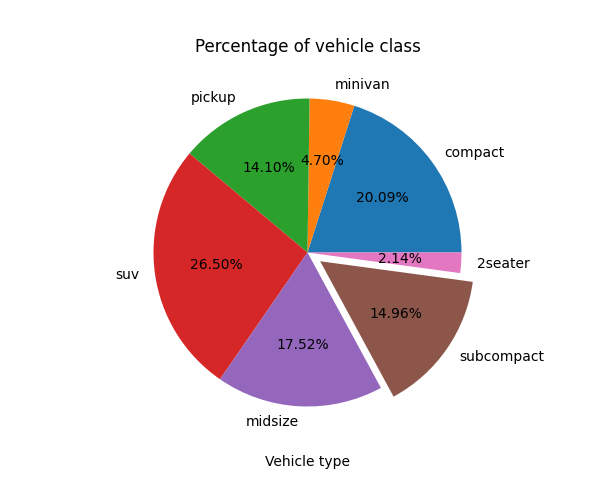

In [15]:
plt.figure(5,figsize = (6,5))
plt.pie(car_class, labels = labels_class, autopct = '%1.2f%%', explode = myexplode)  #Using 2 percentage point and explode to slice subcompact value
plt.title('Percentage of vehicle class')
plt.xlabel('Vehicle type',fontsize = 10);
plt.show()